# Laboratorio Semana 7

Este laboratorio se enfoca en aprender a manipular imagenes con distintas librerías disponibles en python.

Se da una base de código y se debe completar las tareas indicadas

#### 1. Cargar imagenes con distintas librerías:

Consigue una imagen y guarda el directorio o link a ella en un objeto llamado **img_path**, cargala con las distintas librerías proporcionadas en el siguiente código

Completar el código para visualizar con matplotlib las imagenes resultantes

In [2]:
!pip install SimpleITK

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.4/52.4 MB 22.7 MB/s eta 0:00:00


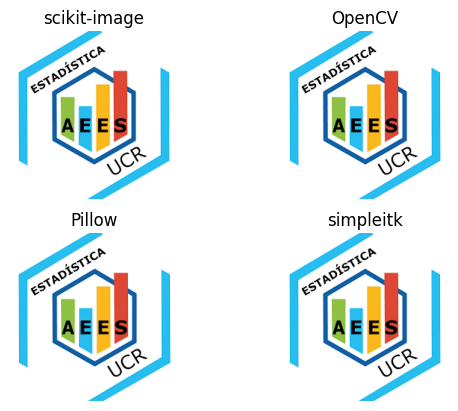

In [8]:
import SimpleITK as sitk
import cv2
from PIL import Image
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

img_path = "/content/drive/MyDrive/MACD/Estudiantes/Laboratorios/estadistica_ucr.png"

# Cargar la imagen de distintas formas
# Primero skimage
image_skimage = io.imread(img_path)

image_sitk = sitk.ReadImage(img_path)
# Convertir en numpy array
image_sitk = sitk.GetArrayViewFromImage(image_sitk)

# Con OpenCV
image_cv = cv2.imread(img_path)
# Las carga en BGR, la cambiamos a RGB
image_cv = cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB)

# Con PILLOW
image_pillow = Image.open(img_path)
image_pillow = image_pillow.convert("RGB")
# A numpy array
image_pillow = np.array(image_pillow)



# Mostrar todas
fig, ax = plt.subplots(2, 2)
# Para skimage
ax[0,0].imshow(image_skimage)
ax[0,0].axis('off')
ax[0,0].set_title('scikit-image')

ax[0,1].imshow(image_cv)
ax[0,1].axis('off')
ax[0,1].set_title('OpenCV')

ax[1,0].imshow(image_pillow)
ax[1,0].axis('off')
ax[1,0].set_title('Pillow')



# Para simpleitk
ax[1,1].imshow(image_sitk)
ax[1,1].axis('off')
ax[1,1].set_title('simpleitk')


plt.show()



#### 2. Ecualización de histograma

Scikit-learn cuenta con ejemplos de cómo realizar esto en su [página](https://scikit-image.org/docs/stable/auto_examples/color_exposure/plot_equalize.html)

Text(0.5, 1.0, 'Ecualizada')

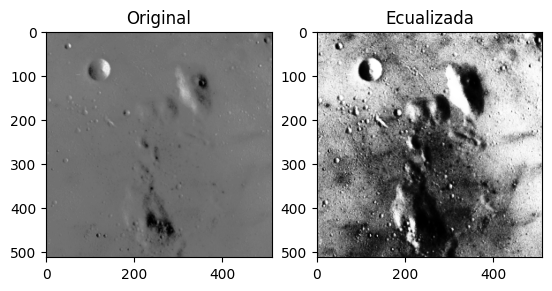

In [9]:
# Ejemplo:
from skimage import data, exposure
# Cargamos imagen de la luna
img_moon = data.moon()
img_eq = exposure.equalize_hist(img_moon)


# Mostrar original y nueva
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img_moon, cmap='gray')
ax[0].set_title('Original')
ax[1].imshow(img_eq, cmap='gray')
ax[1].set_title('Ecualizada')

Aplicar a la imagen cargada en ejercicio 1.

Considerar que si es una imagen de color, tiende a no ser muy útil aplicar esto porque muestra colores poco naturales, funciona muy bien con imagenes en escalas grises.

/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:438: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


Text(0.5, 1.0, 'Ecualizada')

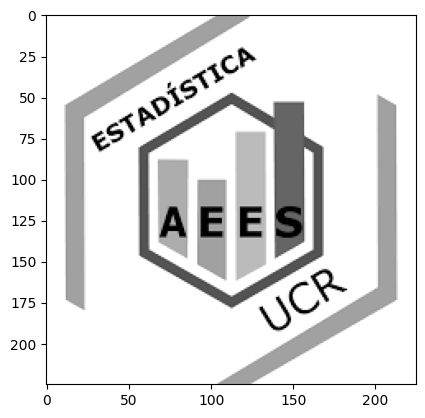

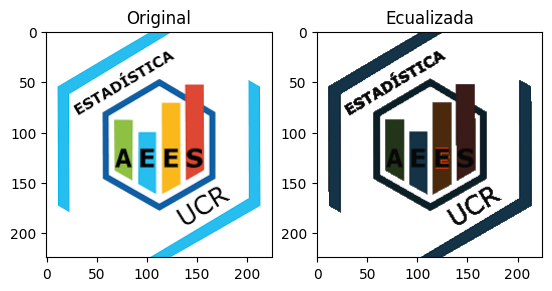

In [15]:
#--------- TU CODIGO AQUI ---------
from skimage import color
estadistica_gris = color.rgb2gray(image_skimage)
plt.imshow(estadistica_gris, cmap="gray")

img_eq = exposure.equalize_hist(image_skimage)

# Mostrar original y nueva
fig, ax = plt.subplots(1, 2)
ax[0].imshow(image_skimage, cmap='gray')
ax[0].set_title('Original')
ax[1].imshow(img_eq, cmap='gray')
ax[1].set_title('Ecualizada')

#### 3. Filtros media y gausiano

[[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0]
 [0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]
 [0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0]
 [0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]]


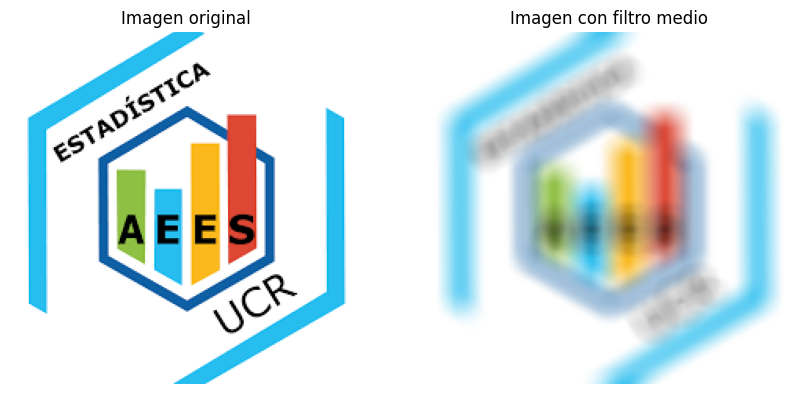

In [21]:
from skimage import io, color
from skimage.filters import rank
from skimage.morphology import disk
import matplotlib.pyplot as plt


# Apply the mean filter using a disk-shaped structuring element (size 3 in this case)
selem = disk(10)  # You can adjust the radius of the disk to control the neighborhood size
print(selem)
# Aplicandolo a cada canal de color
r_filtered = rank.mean(image_skimage[:, :, 0], selem)
g_filtered = rank.mean(image_skimage[:, :, 1], selem)
b_filtered = rank.mean(image_skimage[:, :, 2], selem)
# Agregar los canales de vuelta en un solo objeto
filtered_image = np.stack([r_filtered, g_filtered, b_filtered], axis=-1)


# Display original and mean filtered images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax = axes.ravel()

ax[0].imshow(image_skimage)
ax[0].set_title("Imagen original")
ax[0].axis('off')

ax[1].imshow(filtered_image)
ax[1].set_title("Imagen con filtro medio")
ax[1].axis('off')

plt.show()


Filtro gausiano

(225, 225, 3)


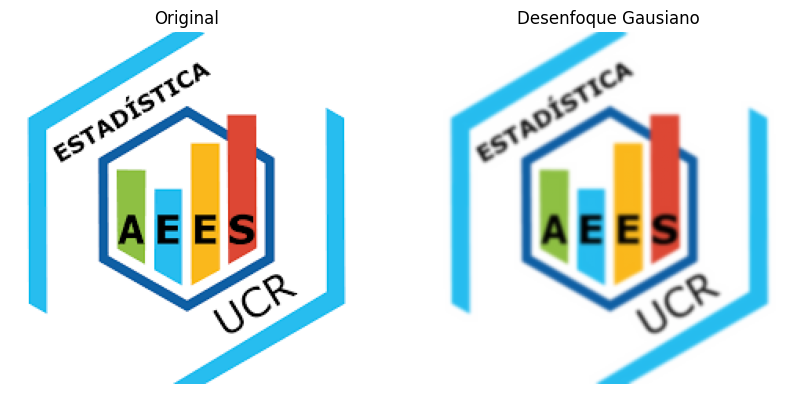

In [29]:
from skimage import io, filters
import matplotlib.pyplot as plt

print(image_skimage.shape)


blurred_image = filters.gaussian(image_skimage, sigma=1, channel_axis=2) # Channel_axis se necesita cuado es a color

# Display original and blurred images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax = axes.ravel()

ax[0].imshow(image_skimage)
ax[0].set_title("Original")
ax[0].axis('off')

ax[1].imshow(blurred_image)
ax[1].set_title("Desenfoque Gausiano")
ax[1].axis('off')

plt.show()


Aplicarlo a la misma imagen con un sigma más alto. Qué le pasa a la imagen?

In [ ]:
#--------- TU CODIGO AQUI ---------

#### 4. Detección de bordes

Empezamos con Sobel sobre una imagen de un gato de la librería skimage

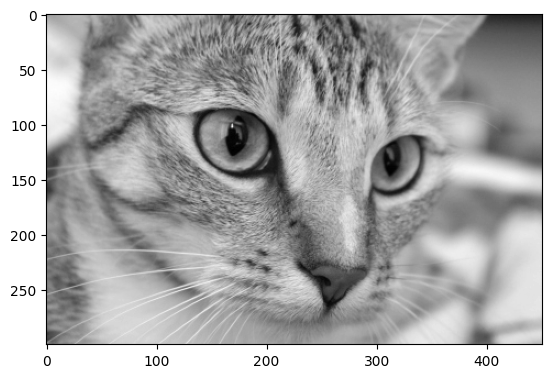

In [32]:
plt.imshow(color.rgb2gray(data.cat()), cmap="gray")

In [33]:
from skimage import feature
img_gris = color.rgb2gray(data.cat())
bordes_sobel = filters.sobel(img_gris)


Aplique canny de manera similar a la misma imagen

In [34]:
bordes_canny = feature.canny(img_gris)

Mostrar las 3 imagenes: original, bordes con canny y sobel en un mismo gráfico

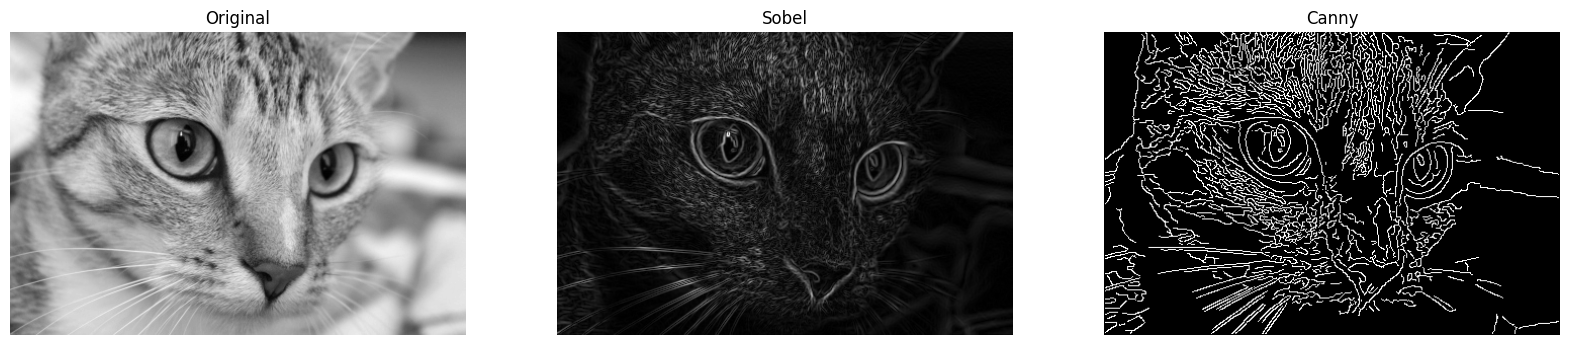

In [38]:
fig, ax = plt.subplots(1, 3, figsize=(20,10))
ax[0].imshow(img_gris, cmap="gray")
ax[0].set_title("Original")
ax[0].axis("off")

ax[1].imshow(bordes_sobel, cmap="gray")
ax[1].set_title("Sobel")
ax[1].axis("off")


ax[2].imshow(bordes_canny, cmap="gray")
ax[2].set_title("Canny")
ax[2].axis("off")

plt.show()

#### 5. Segmentación de imagen

Vamos a usar una image microscópica de la dermis y la epidermis (capas de la piel), para segmentarla con dos tipos de algoritmo vistos en clase

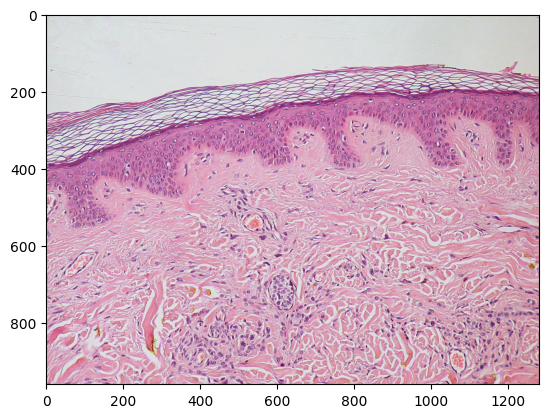

In [39]:
piel = data.skin()
plt.imshow(piel)

Primero aplicamos SLIC

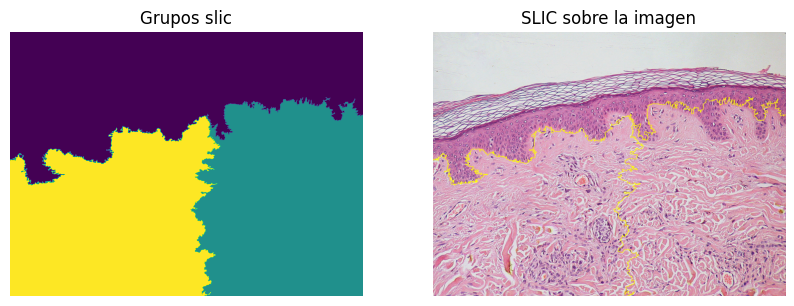

In [48]:
from skimage import io, segmentation
segments_slic = segmentation.slic(piel, n_segments=8, compactness=10, start_label=1)





fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(segments_slic)
ax[0].set_title("Grupos slic")
ax[0].axis('off')

ax[1].imshow(segmentation.mark_boundaries(piel, segments_slic))
ax[1].set_title("SLIC sobre la imagen")
ax[1].axis('off')

plt.show()

Ajuste los distintos parámetros y vea el efecto que produce. Encuentre una mejor combinación que divida las capas de la piel

In [ ]:
#--------- TU CODIGO AQUI ---------

K-medias con distintos valores de K

In [50]:
piel.shape

(960, 1280, 3)

(1228800, 3)


100%|██████████| 4/4 [00:14<00:00,  3.61s/it]


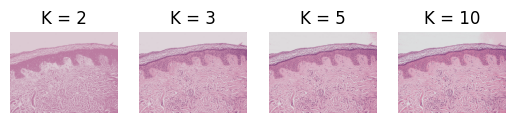

In [51]:

from tqdm import tqdm
# Cambiar a 2D los datos
pixeles = np.float32(piel.reshape(-1, 3))
print(pixeles.shape)

# Aplicar k-medias
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

fig, ax = plt.subplots(1, 4)
ks = [2,3,5,10]
idx = 0
for k in tqdm(ks):
  retval, labels, centers = cv2.kmeans(pixeles, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
  # convert data into 8-bit values
  centers = np.uint8(centers)
  segmented_data = centers[labels.flatten()]
  # reshape data into the original image dimensions
  segmented_image = segmented_data.reshape((piel.shape))
  ax[idx].imshow(segmented_image)
  ax[idx].set_title(f"K = {k}")
  ax[idx].axis("off")
  idx += 1

# plt.show()



Cuál parece ser el mejor?